In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# <span style="font-size: 250%;color:red"> Lança N moedas </span>

In [4]:
def moeda(n_lancamentos = 200):   
    # cara  - 0
    # coroa - 1
    
    moeda = np.random.randint(low = 0,high =2, size = n_lancamentos)          
    
    n_cara  = (moeda == 0).sum()
    n_coroa = n_lancamentos - n_cara
    
    return (n_cara, n_coroa)

In [5]:
n_cara, n_coroa = moeda(n_lancamentos=30)

In [6]:
print(f'numero de cara  {n_cara}')
print(f'numero de coroas {n_coroa}')

numero de cara  14
numero de coroas 16


# <span style="font-size: 250%;color:red"> Experimento de lançaamento de moedas </span>

In [7]:
n_experimentos = 2000000

n_caras = np.empty(shape=n_experimentos, dtype=np.intc)
n_coroas = np.empty(shape=n_experimentos, dtype=np.intc)

j = 0 
for i in range(0, n_experimentos):
    # ... 
    n_cara, n_coroa = moeda(n_lancamentos=200)
    n_caras[i] = n_cara
    n_coroas[i] = n_coroa 
    # ..........................................................
    
    # ...
    j+=1
    if(j == 1000):
      j = 0
      print(f'\rTotal de experimentos [{(i+1)/n_experimentos*100:.2f}]%', end='')
    # ........................................................... 
    
d = {'coroas': n_coroas, 'caras': n_caras}

experimentos = pd.DataFrame(d)    

Total de experimentos [100.00]%

In [8]:
media = experimentos.mean()[1]
std   = experimentos.std()[1]
intervalo_1 = ((media - std), (media + std))
intervalo_2 = ((media - 2*std), (media + 2*std))
intervalo_3 = ((media - 3*std), (media + 3*std))

# <span style="font-size: 250%;color:red"> Histograma pandas

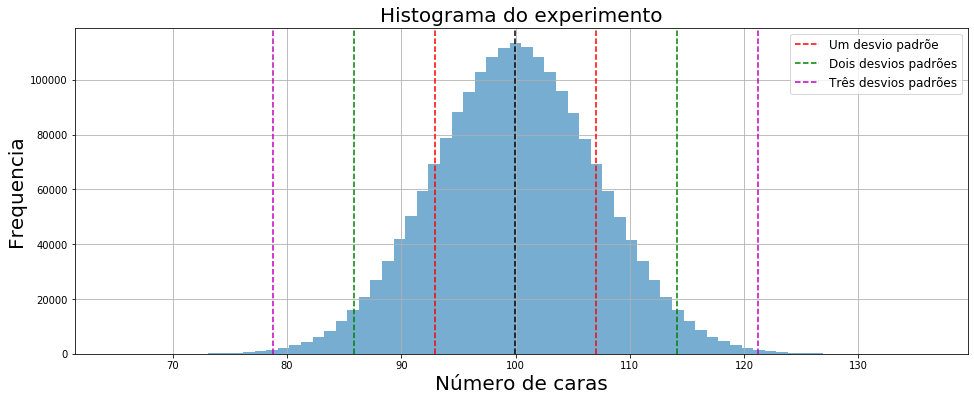

In [9]:
ax = experimentos.hist(column = 'caras', 
                       bins=70,
                       alpha=0.6,
                       figsize = (16,6))

ax = ax[0][0]

ax.set_title('Histograma do experimento', fontsize=20) 
ax.set_xlabel('Número de caras', fontsize=20)   
ax.set_ylabel('Frequencia', fontsize=20)   

# media
ax.axvline(x=media, linestyle='--', color='black')
# um desvio padra
ax.axvline(x=intervalo_1[0], linestyle='--', color='red')
ax.axvline(x=intervalo_1[1], linestyle='--', color='red', label = 'Um desvio padrõe')

# 2 desvio padra
ax.axvline(x=intervalo_2[0], linestyle='--', color='green')
ax.axvline(x=intervalo_2[1], linestyle='--', color='green', label = 'Dois desvios padrões')

# 3 desvio padra
ax.axvline(x=intervalo_3[0], linestyle='--', color='m')
ax.axvline(x=intervalo_3[1], linestyle='--', color='m', label = 'Três desvios padrões')

ax.legend(fontsize=12)

ax

# <span style="font-size: 250%;color:red"> Histograma seaborn

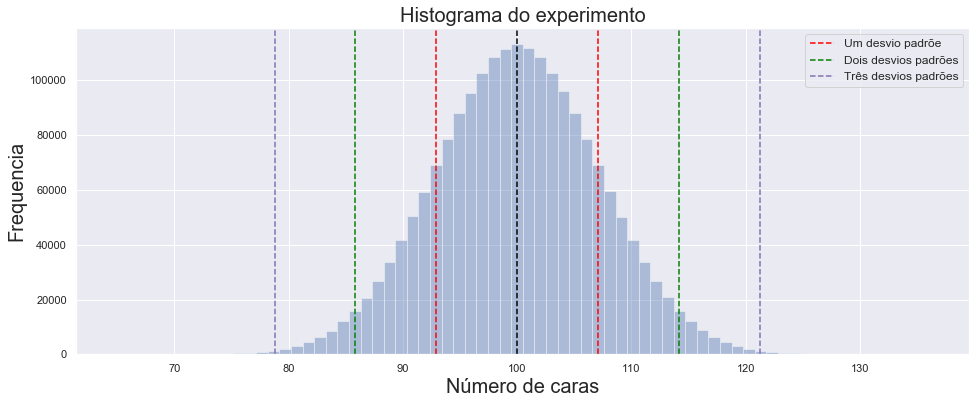

In [10]:
sns.set(rc={'figure.figsize':(16,6)})
ax = sns.distplot(experimentos['caras'],
                  bins = 70, 
                  kde = False)

ax.set_title('Histograma do experimento', fontsize=20) 
ax.set_xlabel('Número de caras', fontsize=20)   
ax.set_ylabel('Frequencia', fontsize=20)  

# media
ax.axvline(x=media, linestyle='--', color='black')
# um desvio padra
ax.axvline(x=intervalo_1[0], linestyle='--', color='red')
ax.axvline(x=intervalo_1[1], linestyle='--', color='red', label = 'Um desvio padrõe')

# 2 desvio padra
ax.axvline(x=intervalo_2[0], linestyle='--', color='green')
ax.axvline(x=intervalo_2[1], linestyle='--', color='green', label = 'Dois desvios padrões')

# 3 desvio padra
ax.axvline(x=intervalo_3[0], linestyle='--', color='m')
ax.axvline(x=intervalo_3[1], linestyle='--', color='m', label = 'Três desvios padrões')

ax.legend(fontsize=12)

ax

## <span style="color:red"> Histograma densidade

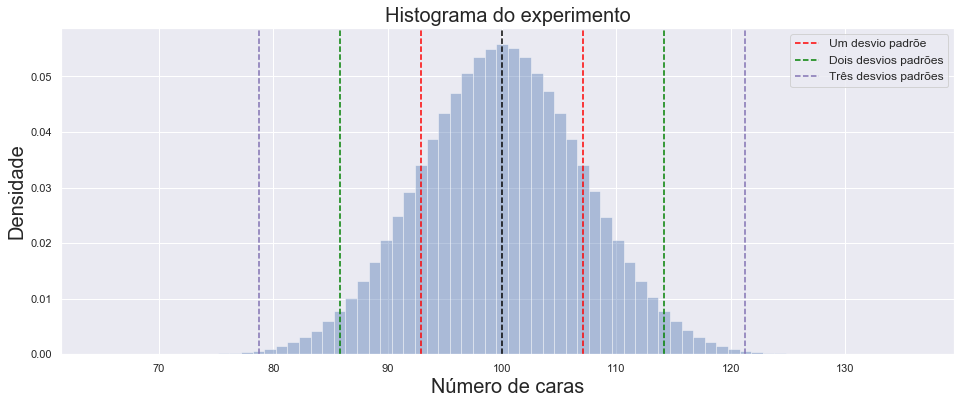

In [11]:
sns.set(rc={'figure.figsize':(16,6)})
ax = sns.distplot(experimentos['caras'],
                  bins = 70,
                  norm_hist = True,
                  hist_kws={'cumulative': False},
                  kde = False)

ax.set_title('Histograma do experimento', fontsize=20) 
ax.set_xlabel('Número de caras', fontsize=20)   
ax.set_ylabel('Densidade', fontsize=20)  

# media
ax.axvline(x=media, linestyle='--', color='black')
# um desvio padra
ax.axvline(x=intervalo_1[0], linestyle='--', color='red')
ax.axvline(x=intervalo_1[1], linestyle='--', color='red', label = 'Um desvio padrõe')

# 2 desvio padra
ax.axvline(x=intervalo_2[0], linestyle='--', color='green')
ax.axvline(x=intervalo_2[1], linestyle='--', color='green', label = 'Dois desvios padrões')

# 3 desvio padra
ax.axvline(x=intervalo_3[0], linestyle='--', color='m')
ax.axvline(x=intervalo_3[1], linestyle='--', color='m', label = 'Três desvios padrões')

#ax.axhline(y=0.5, linestyle='--', color='maroon', label = 'Probabilodade de 50 %')

ax.legend(fontsize=12)

ax

## <span style="color:red"> Histograma acumulado

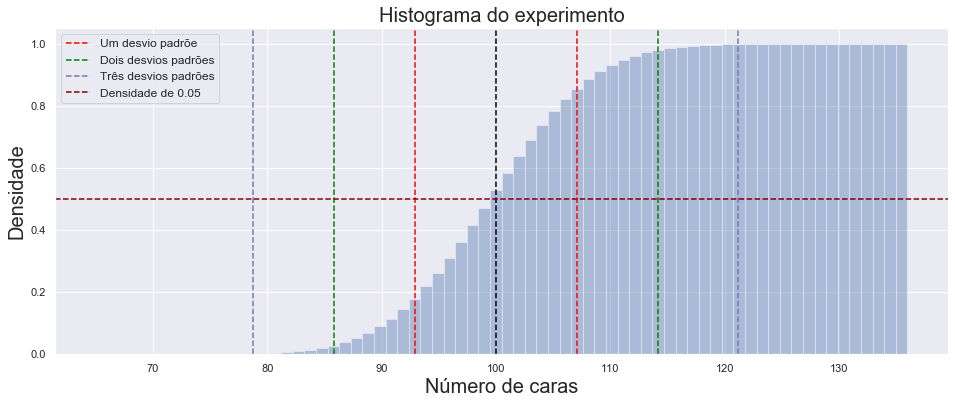

In [13]:
sns.set(rc={'figure.figsize':(16,6)})
ax = sns.distplot(experimentos['caras'],
                  bins = 70,
                  norm_hist = True,
                  hist_kws={'cumulative': True},
                  kde = False)

ax.set_title('Histograma do experimento', fontsize=20) 
ax.set_xlabel('Número de caras', fontsize=20)   
ax.set_ylabel('Densidade', fontsize=20)  

# media
ax.axvline(x=media, linestyle='--', color='black')
# um desvio padra
ax.axvline(x=intervalo_1[0], linestyle='--', color='red')
ax.axvline(x=intervalo_1[1], linestyle='--', color='red', label = 'Um desvio padrõe')

# 2 desvio padra
ax.axvline(x=intervalo_2[0], linestyle='--', color='green')
ax.axvline(x=intervalo_2[1], linestyle='--', color='green', label = 'Dois desvios padrões')

# 3 desvio padra
ax.axvline(x=intervalo_3[0], linestyle='--', color='m')
ax.axvline(x=intervalo_3[1], linestyle='--', color='m', label = 'Três desvios padrões')

ax.axhline(y=0.5, linestyle='--', color='maroon', label = 'Densidade de 0.05')

ax.legend(fontsize=12)

ax

# <span style="font-size: 250%;color:red"> Histograma com matplotlib
    
A curva normal continua foi plotada utizando a meda e desvio padão atraves da formula
    
  $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2 \right)$

In [14]:
def normal(x, mu, sig):
    PI = np.pi
    z = (x - mu)/sig
    a = 1.0/(np.sqrt(2*PI*sig**2))
    
    return a*np.exp(-0.5*z**2)          

In [15]:
x = np.linspace(0,200,num=200)

In [16]:
y = normal(x,media,std)

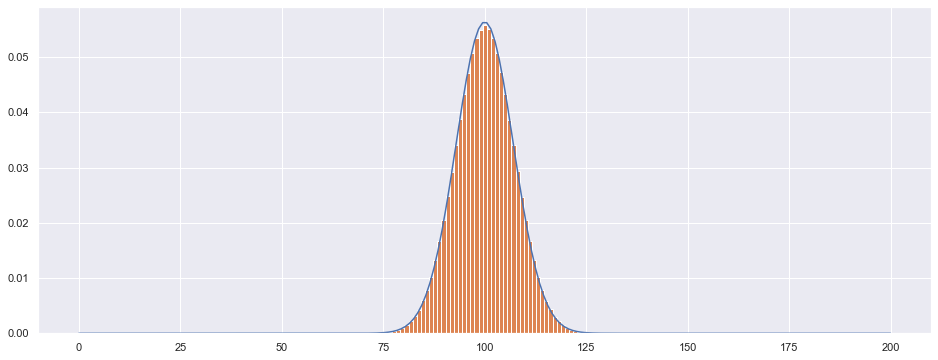

In [17]:
fig, ax = plt.subplots()

ax.plot(x,y)
ax.hist(experimentos['caras'], density=True, bins = 70)
ax